In [12]:
from aeon.registry import all_estimators


estimators_list = all_estimators(
    filter_tags={"capability:multivariate": True},
    estimator_types="classifier",
    as_dataframe=True,
)

print(str(estimators_list.estimator[0]).split("."))




["<class 'aeon", 'classification', 'convolution_based', '_arsenal', "Arsenal'>"]


In [9]:
print(str(estimators_list.estimator[0]).split(".")[2])

convolution_based


In [15]:
import aeon.classification.convolution_based._arsenal
.{estimator_name}

In [16]:
import importlib
base_name = str(estimators_list.estimator[0]).split(".")[2]
module_name = str(estimators_list.estimator[0]).split(".")[3]

estimator_name = estimators_list.name[0]
estimator_module = importlib.import_module(f"aeon.classification.{base_name}.{module_name}")
estimator_class = getattr(estimator_module, estimator_name)
estimator = estimator_class()

In [21]:
tmp = []

for idx in range (len(estimators_list)):
    try:
        base_name = str(estimators_list.estimator[idx]).split(".")[2]
        module_name = str(estimators_list.estimator[idx]).split(".")[3]
        estimator_name = estimators_list.name[idx]
        if estimator_name != "ChannelEnsembleClassifier":
            estimator_module = importlib.import_module(f"aeon.classification.{base_name}.{module_name}")
            estimator_class = getattr(estimator_module, estimator_name)
            estimator = estimator_class()
            tmp.append([estimator_name, estimator])
    except Exception as e:
        print(f"Error with {estimators_list.name[idx]}")
        print(e)
        continue


Error with CNNClassifier
CNNClassifier requires python version to be <3.12, but system python version is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)].
Error with DummyClassifier
No module named "aeon.classification.dummy.DummyClassifier'>"; 'aeon.classification.dummy' is not a package
Error with EncoderClassifier
EncoderClassifier requires python version to be <3.12, but system python version is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)].
Error with FCNClassifier
FCNClassifier requires python version to be <3.12, but system python version is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)].
Error with IndividualInceptionClassifier
IndividualInceptionClassifier requires python version to be <3.12, but system python version is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)].
Error with IndividualLITEClassifier
IndividualLITEClassifier requires python 

In [1]:
from all_estimators import AllEstimators
import numpy as np

clf = AllEstimators({1:1},np.array(2),np.array(2))

In [2]:
clf.estimators_list

,name,estimator
0,Arsenal,<class 'aeon.classification.convolution_based....
1,CNNClassifier,<class 'aeon.classification.deep_learning._cnn...
2,CanonicalIntervalForestClassifier,<class 'aeon.classification.interval_based._ci...
3,Catch22Classifier,<class 'aeon.classification.feature_based._cat...
4,ChannelEnsembleClassifier,<class 'aeon.classification.compose._channel_e...
5,DrCIFClassifier,<class 'aeon.classification.interval_based._dr...
6,DummyClassifier,<class 'aeon.classification.dummy.DummyClassif...
7,ElasticEnsemble,<class 'aeon.classification.distance_based._el...
8,EncoderClassifier,<class 'aeon.classification.deep_learning._enc...
9,FCNClassifier,<class 'aeon.classification.deep_learning._fcn...


In [7]:
from aeon.datasets import load_basic_motions

X_train, y_train = load_basic_motions(split="train")
X_test, y_test = load_basic_motions(split="test")


estimators_list.estimator[0]
#.fit(X_train, y_train)

aeon.classification.convolution_based._arsenal.Arsenal

<class 'numpy.str_'>
<class 'str'>
Точность ансамблевого классификатора: 1.00

Отчет о классификации:
              precision    recall  f1-score   support

   badminton       1.00      1.00      1.00        10
     running       1.00      1.00      1.00        10
    standing       1.00      1.00      1.00        10
     walking       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



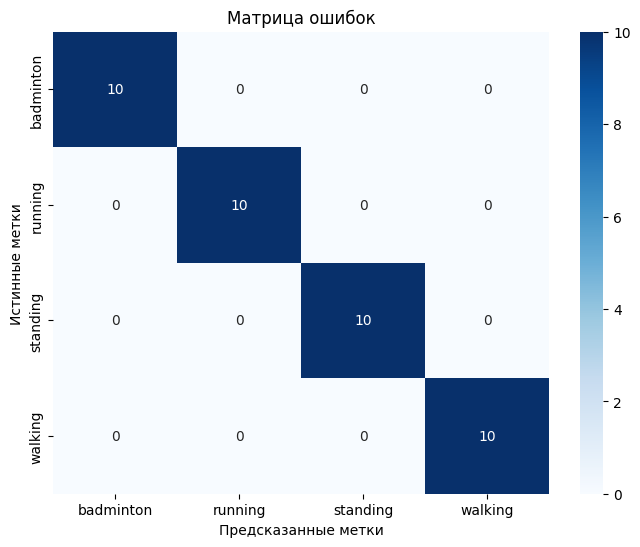

In [6]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt
import seaborn as sns
from aeon.datasets import load_basic_motions
from aeon.classification.interval_based import TimeSeriesForestClassifier
from aeon.classification.convolution_based import RocketClassifier
from aeon.classification.distance_based import KNeighborsTimeSeriesClassifier
from aeon.classification.compose import WeightedEnsembleClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Загрузка набора данных
X_train, y_train = load_basic_motions(split="train", return_X_y=True)
X_test, y_test = load_basic_motions(split="test", return_X_y=True)

# Определение отдельных классификаторов
tsf = TimeSeriesForestClassifier(n_estimators=100)
rocket = RocketClassifier(num_kernels=10000)
knn = KNeighborsTimeSeriesClassifier(n_neighbors=4, distance="dtw")

# Создание ансамблевого классификатора
ensemble_clf = WeightedEnsembleClassifier(classifiers=[tsf, rocket, knn], weights=[1, 1, 1])

# Обучение ансамблевого классификатора
ensemble_clf.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = ensemble_clf.predict(X_test)

pred = []

for item in y_pred:
    if item == 0:
        tmp = 'badminton'
    elif item == 1:
        tmp = 'running'
    elif item == 2:
        tmp = 'standing'
    elif item == 3:
        tmp = 'walking'
    pred.append(tmp)

y_pred = pred

print(type(y_train[0]))
print(type(y_pred[0]))

# Use y_test_encoded and y_pred_encoded for evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность ансамблевого классификатора: {accuracy:.2f}")

print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=ensemble_clf.classes_,
    yticklabels=ensemble_clf.classes_
)
plt.title("Матрица ошибок")
plt.ylabel("Истинные метки")
plt.xlabel("Предсказанные метки")
plt.show()